In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [2]:
df=pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD001.txt', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
df.columns=columns
df['max_time']=df.groupby('unit')['time'].transform('max')
df['remaining_time']=df['max_time']-df['time']
df['label']=df['remaining_time'].clip(upper=130)
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,130
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,130
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,130
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,130
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,130


In [4]:
window_size = 30

rolled_df = roll_time_series(
    df,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_df

Rolling: 100%|██████████| 52/52 [00:09<00:00,  5.58it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label,id
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.03,392,2388,100.0,39.06,23.4190,192,191,130,"(1, 30)"
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.03,392,2388,100.0,39.00,23.4236,192,190,130,"(1, 30)"
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.03,390,2388,100.0,38.95,23.3442,192,189,130,"(1, 30)"
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.03,392,2388,100.0,38.88,23.3739,192,188,130,"(1, 30)"
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.03,393,2388,100.0,38.90,23.4044,192,187,130,"(1, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480355,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,0.03,397,2388,100.0,38.49,22.9735,200,4,4,"(100, 200)"
480356,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,0.03,395,2388,100.0,38.30,23.1594,200,3,3,"(100, 200)"
480357,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,0.03,398,2388,100.0,38.44,22.9333,200,2,2,"(100, 200)"
480358,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,0.03,395,2388,100.0,38.29,23.0640,200,1,1,"(100, 200)"


In [6]:
selected_cols=['id','op1','op2','op3','sr2', 'sr3', 'sr4',
                    'sr7', 'sr8', 'sr9', 'sr11',
                    'sr12', 'sr13', 'sr14', 'sr15',
                    'sr17', 'sr20', 'sr21']

selected_df=rolled_df[selected_cols]
selected_df

,id,op1,op2,op3,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
0,"(1, 30)",-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,"(1, 30)",0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,"(1, 30)",-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,"(1, 30)",0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,"(1, 30)",-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480355,"(100, 200)",-0.0004,-0.0003,100.0,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
480356,"(100, 200)",-0.0016,-0.0005,100.0,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
480357,"(100, 200)",0.0004,0.0000,100.0,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
480358,"(100, 200)",-0.0011,0.0003,100.0,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [7]:
X=extract_features(
    selected_df,
    column_id='id',
    impute_function=impute
)
X

Feature Extraction: 100%|██████████| 60/60 [15:16<00:00, 15.27s/it]  


op1__variance_larger_than_standard_deviation  op1__has_duplicate_max  \
1   30                                            0.0                     0.0   
    31                                            0.0                     0.0   
    32                                            0.0                     0.0   
    33                                            0.0                     0.0   
    34                                            0.0                     0.0   
...                                               ...                     ...   
100 196                                           0.0                     0.0   
    197                                           0.0                     0.0   
    198                                           0.0                     0.0   
    199                                           0.0                     0.0   
    200                                           0.0                     0.0   

         op1__has_duplicate_min  op1__has_duplicate  op1__sum_values  \
1   30                      1.0                 1.0          -0.0166   
    31                      1.0                 1.0          -0.0145   
    32                      1.0                 1.0          -0.0159   
    33                      0.0                 1.0          -0.0158   
    34                      0.0                 1.0          -0.0150   
...                         ...                 ...              ...   
100 196                     0.0                 1.0          -0.0065   
    197                     0.0                 1.0          -0.0099   
    198                     0.0                 1.0          -0.0068   
    199                     0.0                 1.0          -0.0060   
    200                     0.0                 1.0          -0.0058   

         op1__abs_energy  op1__mean_abs_change  op1__mean_change  \
1   30          0.000149              0.003341         -0.000052   
    31          0.000151              0.003376         -0.000017   
    32          0.000148              0.003193          0.000166   
    33          0.000147              0.003183         -0.000169   
    34          0.000149              0.003290          0.000117   
...                  ...                   ...               ...   
100 196         0.000083              0.001966         -0.000076   
    197         0.000083              0.001852          0.000038   
    198         0.000076              0.001893          0.000079   
    199         0.000073              0.001893          0.000079   
    200         0.000072              0.001866         -0.000093   

         op1__mean_second_derivative_central  op1__median  ...  \
1   30                             -0.000107     -0.00035  ...   
    31                              0.000175      0.00010  ...   
    32                             -0.000105      0.00010  ...   
    33                             -0.000037      0.00010  ...   
    34                              0.000145      0.00010  ...   
...                                      ...          ...  ...   
100 196                             0.000077     -0.00045  ...   
    197                            -0.000036     -0.00050  ...   
    198                             0.000063     -0.00045  ...   
    199                            -0.000079     -0.00045  ...   
    200                             0.000020     -0.00045  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1   30                        1.143275                        1.580819   
    31                        1.353591                        1.890363   
    32                        1.213008                        1.890363   
    33                        1.245017                        1.749779   
    34                        1.213008                        1.808046   
...                                ...                             ...   
100 196                       1.037392     

In [12]:
y=rolled_df.groupby('id')['label'].last()
X_filtered=select_features(X, y)
X_filtered

In [18]:
X_filtered.shape

(17731, 4546)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)

# Convert the scaled data back to a DataFrame if needed
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

# Display the scaled DataFrame
relevant_features_scaled_df.head()

,"sr4__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20)","sr12__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)",...,sr15__fourier_entropy__bins_10,sr11__sum_of_reoccurring_values,"sr13__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","sr3__fft_coefficient__attr_""abs""__coeff_3","sr8__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2",sr4__number_peaks__n_3,sr17__autocorrelation__lag_8,"op1__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","op1__fft_coefficient__attr_""real""__coeff_11","op1__fft_coefficient__attr_""angle""__coeff_14"
0,-1.066016,-0.982321,-0.721213,-0.968348,-0.752823,-0.890114,-0.766534,-0.831688,-0.709222,0.942580,...,-0.397313,-1.091008,-0.090785,-1.764366,-0.194163,0.734470,-0.151837,0.210101,0.463016,-1.196825
1,-1.097117,-0.976226,-0.723914,-0.970710,-0.739803,-0.967344,-0.776522,-0.899374,-0.701125,0.979499,...,-0.239547,-0.411518,-0.296617,-1.354189,-0.194163,0.734470,-0.151837,-0.127207,-0.350444,0.564224
2,-1.106308,-0.866456,-0.733177,-0.961493,-0.762792,-0.973034,-0.785738,-0.989056,-0.738312,0.912310,...,-0.028163,0.265679,-0.254753,-1.326941,-0.194163,-0.473926,-0.167882,-0.096374,-0.132194,-1.170545
3,-1.120304,-0.774465,-0.739861,-0.856712,-0.735993,-0.957731,-0.768531,-0.975889,-0.738209,0.828005,...,-0.009730,0.943305,-0.353987,-1.328421,-0.360894,-0.473926,-0.182056,0.032423,0.688420,0.452286
4,-1.107793,-0.780894,-0.696417,-0.771802,-0.693472,-0.843340,-0.684505,-0.934404,-0.661363,0.686096,...,-0.265703,0.943305,-0.377245,-1.394967,-0.360894,-0.473926,-0.182056,-0.017049,-0.863976,-1.442908


In [53]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [54]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
rmse

7.069804964138339

In [25]:
test=pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD001.txt', delim_whitespace=True, header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [26]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
test.columns=columns
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [27]:
window_size = 30

rolled_test = roll_time_series(
    test,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_test

Rolling: 100%|██████████| 51/51 [00:07<00:00,  6.44it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,id
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,"(1, 30)"
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,"(1, 30)"
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,"(1, 30)"
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,"(1, 30)"
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,"(1, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297865,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,"(100, 198)"
297866,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,"(100, 198)"
297867,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,"(100, 198)"
297868,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,"(100, 198)"


In [29]:
selected_test=rolled_test[selected_cols]
selected_test

,id,op1,op2,op3,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
0,"(1, 30)",0.0023,0.0003,100.0,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,"(1, 30)",-0.0027,-0.0003,100.0,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,"(1, 30)",0.0003,0.0001,100.0,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,"(1, 30)",0.0042,0.0000,100.0,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,"(1, 30)",0.0014,0.0000,100.0,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297865,"(100, 198)",0.0049,0.0000,100.0,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
297866,"(100, 198)",-0.0011,-0.0001,100.0,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
297867,"(100, 198)",-0.0006,-0.0003,100.0,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
297868,"(100, 198)",-0.0038,0.0001,100.0,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [30]:
x_test=extract_features(
    selected_test,
    column_id='id',
    impute_function=impute
)
x_test

Feature Extraction: 100%|██████████| 60/60 [08:28<00:00,  8.47s/it]  


sr21__variance_larger_than_standard_deviation  \
1   30                                             0.0   
    31                                             0.0   
2   30                                             0.0   
    31                                             0.0   
    32                                             0.0   
...                                                ...   
100 194                                            0.0   
    195                                            0.0   
    196                                            0.0   
    197                                            0.0   
    198                                            0.0   

         sr21__has_duplicate_max  sr21__has_duplicate_min  \
1   30                       0.0                      0.0   
    31                       0.0                      0.0   
2   30                       0.0                      0.0   
    31                       0.0                      0.0   
    32                       0.0                      0.0   
...                          ...                      ...   
100 194                      0.0                      0.0   
    195                      0.0                      0.0   
    196                      0.0                      0.0   
    197                      0.0                      0.0   
    198                      0.0                      0.0   

         sr21__has_duplicate  sr21__sum_values  sr21__abs_energy  \
1   30                   0.0          701.3968      16398.618229   
    31                   0.0          701.3785      16397.763094   
2   30                   0.0          699.7772      16323.083308   
    31                   0.0          699.6914      16319.076551   
    32                   0.0          699.7151      16320.181068   
...                      ...               ...               ...   
100 194                  1.0          698.6181      16269.031663   
    195                  1.0          698.6682      16271.361518   
    196                  1.0          698.5251      16264.699741   
    197                  1.0          698.4462      16261.021525   
    198                  1.0          698.3093      16254.654594   

         sr21__mean_abs_change  sr21__mean_change  \
1   30                0.048745           0.001152   
    31                0.049903          -0.001255   
2   30                0.084100          -0.003017   
    31                0.080638           0.000562   
    32                0.076886          -0.003190   
...                        ...                ...   
100 194               0.072255          -0.001021   
    195               0.070824          -0.002452   
    196               0.073286          -0.004955   
    197               0.074610          -0.001810   
    198               0.077307          -0.004934   

         sr21__mean_second_derivative_central  sr21__median  ...  \
1   30                               0.000477      23.37775  ...   
    31                              -0.001370      23.37775  ...   
2   30                               0.001846      23.31555  ...   
    31                              -0.002045      23.31035  ...   
    32                              -0.001002      23.31405  ...   
...                                       ...           ...  ...   
100 194                             -0.003911      23.29710  ...   
    195                              0.001413      23.29710  ...   
    196                             -0.000814      23.29570  ...   
    197                              0.001046      23.29375  ...   
    198                             -0.000961      23.29220  ...   

         sr20__fourier_entropy__bins_5  sr20__fourier_entropy__bins_10  \
1   30                        1.401393                        1.890363   
    31                        1.234245                        1.684373   
2   30                        0.986899                        1.299651   
    31      

In [55]:
selected_features = relevant_features_scaled_df.columns 

relevant_test_features = x_test[selected_features]

# Assuming you have a scaler fitted on the training data's relevant features
relevant_test_features_scaled = scaler.transform(relevant_test_features)

# Convert to DataFrame if needed for further analysis or compatibility
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

# Display the first few rows of the processed test features
relevant_test_features_scaled_df.head()

,"sr4__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)","sr3__cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20)","sr12__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)",...,sr15__fourier_entropy__bins_10,sr11__sum_of_reoccurring_values,"sr13__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","sr3__fft_coefficient__attr_""abs""__coeff_3","sr8__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2",sr4__number_peaks__n_3,sr17__autocorrelation__lag_8,"op1__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","op1__fft_coefficient__attr_""real""__coeff_11","op1__fft_coefficient__attr_""angle""__coeff_14"
0,-0.738048,-1.239214,-1.185757,-1.266221,-1.174635,-1.299968,-1.215759,-1.203913,-1.194568,0.742557,...,0.103447,-0.410658,-0.012111,-0.633831,0.055934,1.942866,-1.532728,-0.730054,2.215356,-0.557600
1,-0.728904,-1.238675,-1.191009,-1.235414,-1.181783,-1.262708,-1.170129,-1.297619,-1.185679,0.787878,...,0.710137,0.266252,0.031177,-1.036173,0.055934,0.734470,-0.868055,-1.131572,-1.313604,0.930062
2,-0.387728,-0.178140,-0.200485,-0.231045,-0.206823,-0.252702,-0.216334,-0.265264,-0.209103,-0.055966,...,-1.256513,-1.080259,-0.082272,0.512424,-1.194552,-0.473926,1.319332,0.485056,-0.166962,0.490183
3,-0.429905,-0.204870,-0.201396,-0.162778,-0.193519,-0.218661,-0.201246,-0.244007,-0.165370,-0.080504,...,-0.905796,-1.080259,-0.363600,0.705276,-1.194552,-0.473926,1.226230,-0.369971,0.356850,-1.429216
4,-0.443113,-0.181352,-0.148745,-0.190919,-0.186188,-0.148046,-0.177964,-0.204798,-0.129840,-0.159557,...,-0.028163,-1.080259,-0.519335,1.099987,-1.194552,-0.473926,0.895640,-0.790518,-0.798064,0.513810


In [32]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD001.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
Y_test = true_rul['RUL']
Y_test.head()

0    112
1     98
2     69
3     82
4     91
Name: RUL, dtype: int64

In [56]:
y_pred = xgb_model.predict(relevant_test_features_scaled_df)

In [57]:
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred 
temp

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,prediction
id,,,,,,,,,,,,,,,,,,,,,
"(1, 30)",1,30,-0.0025,0.0004,100.0,518.67,642.79,1585.72,1400.97,14.62,...,2388.10,8134.79,8.4110,0.03,391,2388,100.0,39.09,23.4069,106.419426
"(1, 31)",1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,109.926537
"(2, 30)",2,30,0.0015,0.0004,100.0,518.67,642.75,1583.78,1409.97,14.62,...,2388.11,8132.58,8.4629,0.03,393,2388,100.0,38.93,23.3048,124.760574
"(2, 31)",2,31,0.0003,0.0002,100.0,518.67,642.77,1591.32,1402.47,14.62,...,2388.13,8129.54,8.4312,0.03,394,2388,100.0,38.74,23.3065,119.321274
"(2, 32)",2,32,0.0032,0.0002,100.0,518.67,642.78,1594.31,1416.93,14.62,...,2388.11,8129.92,8.4061,0.03,394,2388,100.0,38.74,23.3139,122.597427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(100, 194)",100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,22.267174
"(100, 195)",100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,22.839054
"(100, 196)",100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,23.851530


In [58]:
Y_pred = temp.groupby('unit')['prediction'].last()

In [59]:
Y_pred = Y_pred.to_numpy()

In [60]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**0.5
rmse

14.139902737935923

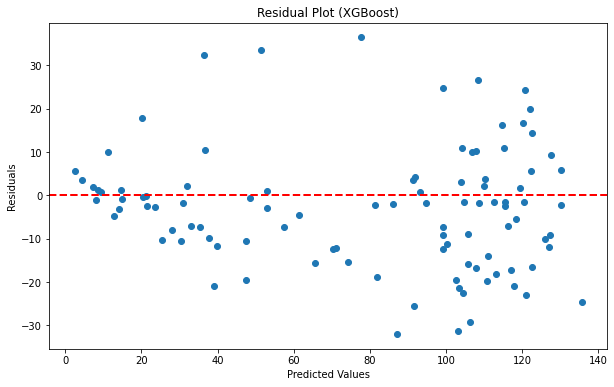

In [61]:
# Step 4: Calculate residuals (difference between actual and predicted values)
residuals = Y_test - Y_pred

# Step 5: Plot residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()